In [25]:
from self_supervised_halos.utils.utils import data_preprocess_path, check_cuda
from scripts.classification_2d import ClassificationModel, report_classification_performance

from self_supervised_halos.utils.dataloader import HaloDataset, img2d_transform, subhalos_df, DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

device = check_cuda()

CUDA is not available.
Device: cpu


# Data loaders

In [2]:
dataset = HaloDataset(root_dir=data_preprocess_path,subhalos_df=subhalos_df, 
                      load_2d=True, load_3d=False, load_mass=False,
                        choose_two_2d = False,
                      DEBUG_LIMIT_FILES = None)

Preparing 2D data: 100%|██████████| 16544/16544 [00:35<00:00, 464.54it/s]


In [26]:
if device=='cpu':
    batch_size = 128
else:
    print('dataloader on gpu')
    batch_size = 512

print(f'Batch size: {batch_size}')

n_data = len(dataset)
f_train = 0.6
f_val = 0.2
f_test = 1 - f_train - f_val


train_size = int(f_train*len(dataset))
val_size = int(f_val*len(dataset))
test_size = len(dataset) - train_size - val_size


trainval_ds, test_ds = torch.utils.data.random_split(dataset, [train_size+val_size, test_size])
train_size = int(f_train/(f_train+f_val)*len(trainval_ds))
val_size = len(trainval_ds) - train_size

train_ds, val_ds = torch.utils.data.random_split(trainval_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=True)


Batch size: 128


# Training loop

In [27]:
lr = 5e-3
n_epochs=60


criterion = nn.CrossEntropyLoss(weight=dataset.mass_bins_weights.to(device)).to(device)

model = ClassificationModel(
                    optimizer_class=torch.optim.Adam,
                    optimizer_params={'lr':lr},
                    scheduler_class=torch.optim.lr_scheduler.StepLR,
                    scheduler_params={'step_size':15, 'gamma':0.5},
                    criterion=criterion,
                    history=None,
                    transform=img2d_transform,
)

model.load('Classification_2d.pth')

#model.trial_forward_pass(train_loader, device);

Model Classification_2d loaded at epoch 60


0.47846884375963455

In [6]:
model.training_loop(
    train_loader=train_loader, 
    val_loader=val_loader,
    num_epochs=n_epochs, 
    device=device)

Epoch 1/60 Training: 100%|██████████| 78/78 [00:06<00:00, 11.74it/s]


Epoch 1, Training Loss: 1.5224335132501063


Epochs:   2%|▏         | 1/60 [00:08<08:41,  8.85s/it]

Epoch 1, Validation Loss: 1.410744479069343


Epoch 2/60 Training: 100%|██████████| 78/78 [00:07<00:00,  9.99it/s]


Epoch 2, Training Loss: 1.423598926800948


Epochs:   3%|▎         | 2/60 [00:17<08:39,  8.96s/it]

Epoch 2, Validation Loss: 1.3496054594333355


Epoch 3/60 Training: 100%|██████████| 78/78 [00:06<00:00, 11.36it/s]


Epoch 3, Training Loss: 1.2688265098975255


Epochs:   5%|▌         | 3/60 [00:26<08:09,  8.58s/it]

Epoch 3, Validation Loss: 1.0586730195925786


Epoch 4/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.26it/s]


Epoch 4, Training Loss: 1.0705578907942161


Epochs:   7%|▋         | 4/60 [00:32<07:19,  7.85s/it]

Epoch 4, Validation Loss: 0.9332776711537287


Epoch 5/60 Training: 100%|██████████| 78/78 [00:07<00:00, 10.59it/s]


Epoch 5, Training Loss: 0.9044344478692764


Epochs:   8%|▊         | 5/60 [00:41<07:29,  8.17s/it]

Epoch 5, Validation Loss: 0.7202450380875514


Epoch 6/60 Training: 100%|██████████| 78/78 [00:07<00:00,  9.82it/s]


Epoch 6, Training Loss: 0.9259646313312726


Epochs:  10%|█         | 6/60 [00:50<07:36,  8.46s/it]

Epoch 6, Validation Loss: 0.9772234490284553


Epoch 7/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.33it/s]


Epoch 7, Training Loss: 0.8048343669909698


Epochs:  12%|█▏        | 7/60 [00:57<06:55,  7.84s/it]

Epoch 7, Validation Loss: 0.6819291412830353


Epoch 8/60 Training: 100%|██████████| 78/78 [00:06<00:00, 12.48it/s]


Epoch 8, Training Loss: 0.8039823350233909


Epochs:  13%|█▎        | 8/60 [01:04<06:42,  7.74s/it]

Epoch 8, Validation Loss: 0.7091144529672769


Epoch 9/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.24it/s]


Epoch 9, Training Loss: 0.802853585435794


Epochs:  15%|█▌        | 9/60 [01:11<06:26,  7.58s/it]

Epoch 9, Validation Loss: 1.2374476217306578


Epoch 10/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.16it/s]


Epoch 10, Training Loss: 0.7525499677046751


Epochs:  17%|█▋        | 10/60 [01:18<06:11,  7.43s/it]

Epoch 10, Validation Loss: 0.6937801196024969


Epoch 11/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.38it/s]


Epoch 11, Training Loss: 0.712775414570784


Epochs:  18%|█▊        | 11/60 [01:25<05:56,  7.28s/it]

Epoch 11, Validation Loss: 0.7376432304198925


Epoch 12/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.71it/s]


Epoch 12, Training Loss: 0.6610325788840269


Epochs:  20%|██        | 12/60 [01:32<05:42,  7.13s/it]

Epoch 12, Validation Loss: 0.5802272535287417


Epoch 13/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.67it/s]


Epoch 13, Training Loss: 0.663168707337135


Epochs:  22%|██▏       | 13/60 [01:39<05:34,  7.12s/it]

Epoch 13, Validation Loss: 0.6606205782065024


Epoch 14/60 Training: 100%|██████████| 78/78 [00:07<00:00, 10.75it/s]


Epoch 14, Training Loss: 0.6693813162736404


Epochs:  23%|██▎       | 14/60 [01:48<05:55,  7.73s/it]

Epoch 14, Validation Loss: 0.6895261189112296


Epoch 15/60 Training: 100%|██████████| 78/78 [00:06<00:00, 12.55it/s]


Epoch 15, Training Loss: 0.7335564509416238


Epochs:  25%|██▌       | 15/60 [01:56<05:52,  7.84s/it]

Epoch 15, Validation Loss: 0.8270663664891169


Epoch 16/60 Training: 100%|██████████| 78/78 [00:06<00:00, 11.44it/s]


Epoch 16, Training Loss: 0.6784206453042153


Epochs:  27%|██▋       | 16/60 [02:04<05:45,  7.86s/it]

Epoch 16, Validation Loss: 0.5529223818045396


Epoch 17/60 Training: 100%|██████████| 78/78 [00:07<00:00, 11.14it/s]


Epoch 17, Training Loss: 0.5562133005796335


Epochs:  28%|██▊       | 17/60 [02:13<05:46,  8.06s/it]

Epoch 17, Validation Loss: 0.5759408130095556


Epoch 18/60 Training: 100%|██████████| 78/78 [00:08<00:00,  9.56it/s]


Epoch 18, Training Loss: 0.6266294580239516


Epochs:  30%|███       | 18/60 [02:23<06:01,  8.60s/it]

Epoch 18, Validation Loss: 0.5772620496841577


Epoch 19/60 Training: 100%|██████████| 78/78 [00:07<00:00, 11.06it/s]


Epoch 19, Training Loss: 0.6121032050786874


Epochs:  32%|███▏      | 19/60 [02:31<05:53,  8.62s/it]

Epoch 19, Validation Loss: 0.5391137691644522


Epoch 20/60 Training: 100%|██████████| 78/78 [00:06<00:00, 11.23it/s]


Epoch 20, Training Loss: 0.545836587364857


Epochs:  33%|███▎      | 20/60 [02:40<05:41,  8.55s/it]

Epoch 20, Validation Loss: 0.5872452098589677


Epoch 21/60 Training: 100%|██████████| 78/78 [00:06<00:00, 11.49it/s]


Epoch 21, Training Loss: 0.5485964688735131


Epochs:  35%|███▌      | 21/60 [02:48<05:27,  8.39s/it]

Epoch 21, Validation Loss: 0.578817109648998


Epoch 22/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.42it/s]


Epoch 22, Training Loss: 0.5407096166641284


Epochs:  37%|███▋      | 22/60 [02:55<05:03,  7.98s/it]

Epoch 22, Validation Loss: 0.5261806215231235


Epoch 23/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.94it/s]


Epoch 23, Training Loss: 0.5803927278671509


Epochs:  38%|███▊      | 23/60 [03:02<04:40,  7.59s/it]

Epoch 23, Validation Loss: 0.5668903784109995


Epoch 24/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.18it/s]


Epoch 24, Training Loss: 0.6112437511865909


Epochs:  40%|████      | 24/60 [03:08<04:22,  7.30s/it]

Epoch 24, Validation Loss: 0.49912728598484624


Epoch 25/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.49it/s]


Epoch 25, Training Loss: 0.5521677442086048


Epochs:  42%|████▏     | 25/60 [03:15<04:08,  7.09s/it]

Epoch 25, Validation Loss: 0.5183970813567822


Epoch 26/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.41it/s]


Epoch 26, Training Loss: 0.5553688853979111


Epochs:  43%|████▎     | 26/60 [03:21<03:56,  6.95s/it]

Epoch 26, Validation Loss: 0.5440864115953445


Epoch 27/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.33it/s]


Epoch 27, Training Loss: 0.5142784852247971


Epochs:  45%|████▌     | 27/60 [03:28<03:46,  6.86s/it]

Epoch 27, Validation Loss: 0.5397441192315175


Epoch 28/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.41it/s]


Epoch 28, Training Loss: 0.5257846522025573


Epochs:  47%|████▋     | 28/60 [03:35<03:38,  6.81s/it]

Epoch 28, Validation Loss: 0.5629377800684708


Epoch 29/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.45it/s]


Epoch 29, Training Loss: 0.5358524162035722


Epochs:  48%|████▊     | 29/60 [03:41<03:28,  6.73s/it]

Epoch 29, Validation Loss: 0.5395192882189384


Epoch 30/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.09it/s]


Epoch 30, Training Loss: 0.5724595964719088


Epochs:  50%|█████     | 30/60 [03:48<03:21,  6.71s/it]

Epoch 30, Validation Loss: 0.6146344783214422


Epoch 31/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.21it/s]


Epoch 31, Training Loss: 0.5501481730204362


Epochs:  52%|█████▏    | 31/60 [03:54<03:13,  6.67s/it]

Epoch 31, Validation Loss: 0.6608749983402399


Epoch 32/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.97it/s]


Epoch 32, Training Loss: 0.5018407855278406


Epochs:  53%|█████▎    | 32/60 [04:01<03:07,  6.68s/it]

Epoch 32, Validation Loss: 0.5811761159163255


Epoch 33/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.21it/s]


Epoch 33, Training Loss: 0.5200671026339898


Epochs:  55%|█████▌    | 33/60 [04:08<02:59,  6.66s/it]

Epoch 33, Validation Loss: 0.4937223792076111


Epoch 34/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.41it/s]


Epoch 34, Training Loss: 0.48745518387892306


Epochs:  57%|█████▋    | 34/60 [04:14<02:52,  6.65s/it]

Epoch 34, Validation Loss: 0.49529566787756407


Epoch 35/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.41it/s]


Epoch 35, Training Loss: 0.5047665750369047


Epochs:  58%|█████▊    | 35/60 [04:21<02:46,  6.65s/it]

Epoch 35, Validation Loss: 0.6038506913643616


Epoch 36/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.29it/s]


Epoch 36, Training Loss: 0.5288777538599112


Epochs:  60%|██████    | 36/60 [04:28<02:39,  6.66s/it]

Epoch 36, Validation Loss: 0.5472259888282189


Epoch 37/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.43it/s]


Epoch 37, Training Loss: 0.520794886427048


Epochs:  62%|██████▏   | 37/60 [04:34<02:33,  6.67s/it]

Epoch 37, Validation Loss: 0.4762183634134439


Epoch 38/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.35it/s]


Epoch 38, Training Loss: 0.49425340653994143


Epochs:  63%|██████▎   | 38/60 [04:41<02:25,  6.63s/it]

Epoch 38, Validation Loss: 0.4542599813296245


Epoch 39/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.07it/s]


Epoch 39, Training Loss: 0.5181082143233373


Epochs:  65%|██████▌   | 39/60 [04:48<02:19,  6.64s/it]

Epoch 39, Validation Loss: 0.7722145479459029


Epoch 40/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.03it/s]


Epoch 40, Training Loss: 0.500508569754087


Epochs:  67%|██████▋   | 40/60 [04:54<02:13,  6.66s/it]

Epoch 40, Validation Loss: 0.4831603742562808


Epoch 41/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.08it/s]


Epoch 41, Training Loss: 0.5160542352077289


Epochs:  68%|██████▊   | 41/60 [05:01<02:06,  6.65s/it]

Epoch 41, Validation Loss: 0.5443931783621128


Epoch 42/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.05it/s]


Epoch 42, Training Loss: 0.48654450667210114


Epochs:  70%|███████   | 42/60 [05:08<01:59,  6.67s/it]

Epoch 42, Validation Loss: 0.5133758198756438


Epoch 43/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.20it/s]


Epoch 43, Training Loss: 0.4784254596019403


Epochs:  72%|███████▏  | 43/60 [05:14<01:53,  6.68s/it]

Epoch 43, Validation Loss: 0.47446173658737767


Epoch 44/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.32it/s]


Epoch 44, Training Loss: 0.5084009785682727


Epochs:  73%|███████▎  | 44/60 [05:21<01:46,  6.68s/it]

Epoch 44, Validation Loss: 0.47939870334588564


Epoch 45/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.37it/s]


Epoch 45, Training Loss: 0.5104432274133731


Epochs:  75%|███████▌  | 45/60 [05:28<01:40,  6.68s/it]

Epoch 45, Validation Loss: 0.451445005260981


Epoch 46/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.14it/s]


Epoch 46, Training Loss: 0.4913188685209323


Epochs:  77%|███████▋  | 46/60 [05:34<01:33,  6.66s/it]

Epoch 46, Validation Loss: 0.47250930621073794


Epoch 47/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.03it/s]


Epoch 47, Training Loss: 0.47064486375221837


Epochs:  78%|███████▊  | 47/60 [05:41<01:26,  6.68s/it]

Epoch 47, Validation Loss: 0.4874443102341432


Epoch 48/60 Training: 100%|██████████| 78/78 [00:05<00:00, 14.07it/s]


Epoch 48, Training Loss: 0.49159080592485577


Epochs:  80%|████████  | 48/60 [05:48<01:20,  6.68s/it]

Epoch 48, Validation Loss: 0.4685920155965365


Epoch 49/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.80it/s]


Epoch 49, Training Loss: 0.5168138994620397


Epochs:  82%|████████▏ | 49/60 [05:55<01:13,  6.71s/it]

Epoch 49, Validation Loss: 0.5033995910332754


Epoch 50/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.65it/s]


Epoch 50, Training Loss: 0.5017235420453243


Epochs:  83%|████████▎ | 50/60 [06:01<01:07,  6.75s/it]

Epoch 50, Validation Loss: 0.5032866688875052


Epoch 51/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.94it/s]


Epoch 51, Training Loss: 0.4823013154359964


Epochs:  85%|████████▌ | 51/60 [06:08<01:00,  6.75s/it]

Epoch 51, Validation Loss: 0.46843424095557284


Epoch 52/60 Training: 100%|██████████| 78/78 [00:06<00:00, 11.45it/s]


Epoch 52, Training Loss: 0.47999248252465176


Epochs:  87%|████████▋ | 52/60 [06:16<00:57,  7.17s/it]

Epoch 52, Validation Loss: 0.4544456669917473


Epoch 53/60 Training: 100%|██████████| 78/78 [00:09<00:00,  8.08it/s]


Epoch 53, Training Loss: 0.4556726614634196


Epochs:  88%|████████▊ | 53/60 [06:27<00:58,  8.32s/it]

Epoch 53, Validation Loss: 0.5222752472529044


Epoch 54/60 Training: 100%|██████████| 78/78 [00:05<00:00, 13.18it/s]


Epoch 54, Training Loss: 0.465429724026949


Epochs:  90%|█████████ | 54/60 [06:34<00:47,  7.95s/it]

Epoch 54, Validation Loss: 0.48494217831354874


Epoch 55/60 Training: 100%|██████████| 78/78 [00:07<00:00, 10.05it/s]


Epoch 55, Training Loss: 0.45641196691072905


Epochs:  92%|█████████▏| 55/60 [06:43<00:41,  8.27s/it]

Epoch 55, Validation Loss: 0.49666211811395794


Epoch 56/60 Training: 100%|██████████| 78/78 [00:06<00:00, 12.14it/s]


Epoch 56, Training Loss: 0.4743732340060748


Epochs:  93%|█████████▎| 56/60 [06:51<00:32,  8.10s/it]

Epoch 56, Validation Loss: 0.48794007301330566


Epoch 57/60 Training: 100%|██████████| 78/78 [00:07<00:00, 10.43it/s]


Epoch 57, Training Loss: 0.45889355280460453


Epochs:  95%|█████████▌| 57/60 [07:00<00:24,  8.25s/it]

Epoch 57, Validation Loss: 0.5360027161928324


Epoch 58/60 Training: 100%|██████████| 78/78 [00:08<00:00,  9.44it/s]


Epoch 58, Training Loss: 0.47543675777239675


Epochs:  97%|█████████▋| 58/60 [07:10<00:17,  8.81s/it]

Epoch 58, Validation Loss: 0.5186674904364806


Epoch 59/60 Training: 100%|██████████| 78/78 [00:06<00:00, 12.15it/s]


Epoch 59, Training Loss: 0.4738292327293983


Epochs:  98%|█████████▊| 59/60 [07:18<00:08,  8.64s/it]

Epoch 59, Validation Loss: 0.47502712217661053


Epoch 60/60 Training: 100%|██████████| 78/78 [00:06<00:00, 11.79it/s]


Epoch 60, Training Loss: 0.47846884375963455


Epochs: 100%|██████████| 60/60 [07:26<00:00,  7.44s/it]

Epoch 60, Validation Loss: 0.4665690201979417


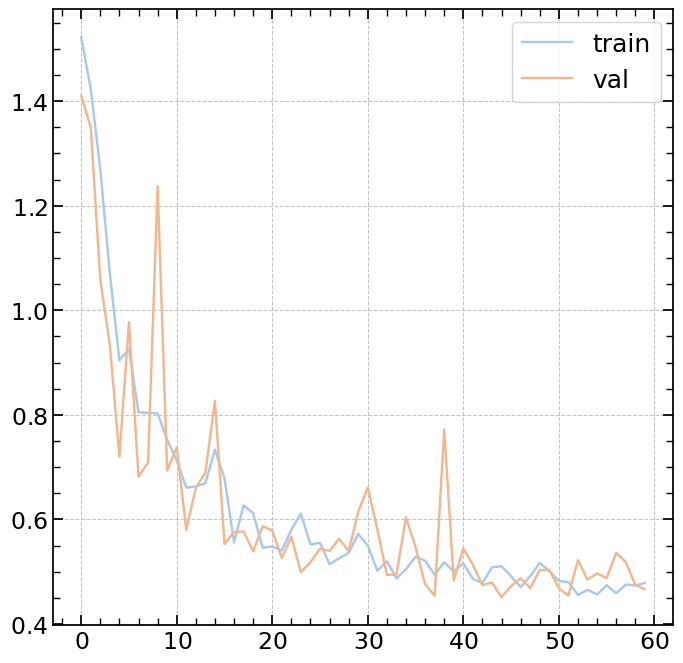

In [28]:
%matplotlib inline
plt.plot(model.history['train_loss'], label='train')
plt.plot(model.history['val_loss'], label='val')
plt.legend()
plt.show()

In [29]:
model.save()

Model Classification_2d saved at epoch 60


# Measure performance

Trial Forward Pass:   0%|          | 0/78 [00:00<?, ?it/s]

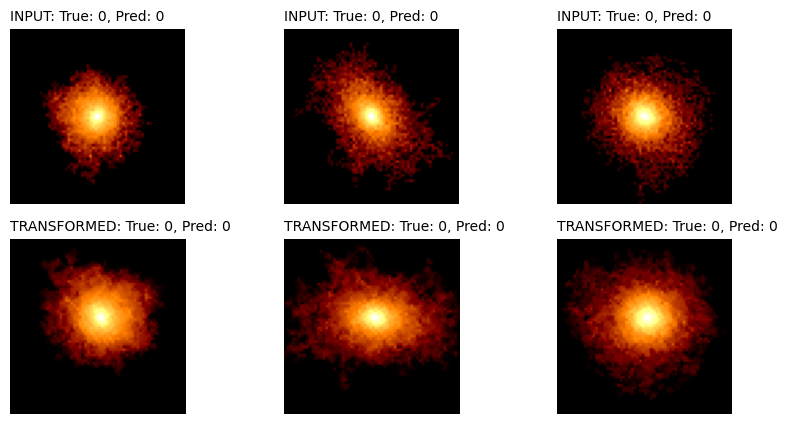

Trial Forward Pass:   0%|          | 0/78 [00:00<?, ?it/s]


In [31]:
model.show_transforms(train_loader, device);

Classification Performance: 26it [00:00, 30.97it/s]
Classification Performance: 0it [00:00, ?it/s]


pred_class,0,1,2,3,4,5,6,7,8,9,All
true_class,,,,,,,,,,,
0,1711,20,0,0,0,0,0,0,0,1,1732
1,322,565,7,0,0,0,0,0,0,0,894
2,1,165,189,12,0,0,0,0,0,0,367
3,0,0,70,95,3,0,0,0,0,0,168
4,0,0,1,32,41,7,0,0,0,0,81
5,0,0,0,4,10,22,0,1,1,0,38
6,0,0,1,0,0,11,6,2,0,0,20
7,0,0,0,0,0,0,3,5,0,0,8
8,0,0,0,0,0,0,0,1,0,0,1


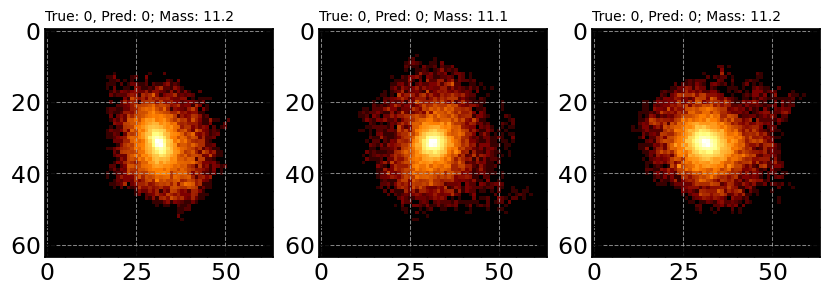

In [12]:
result_df = report_classification_performance(model, val_loader, 
device=device)
report_classification_performance(model, val_loader, device=device, viz_one = True)

pd.crosstab(result_df['true_class'], result_df['pred_class'], margins=True)

# Embeddings

In [21]:
from openTSNE import TSNE #!conda install --channel conda-forge opentsne -y
from tqdm import tqdm 

def gather_cnn_features(model, loader, device, transform = None):
    model.model.eval()
    cnn = model.model.cnn
    features = []
    labels = []
    with torch.no_grad():
        for i, batch in tqdm(enumerate(loader), total=len(loader)):
            data, label = batch
            img = data[0]
            label = label[1]

            img = img.to(device)
            label = label.to(device)
            if transform is not None:
                img = transform(img)


            output = cnn(img).cpu().numpy()
            
            features.append(output)
            labels.append(label.cpu().numpy())
    return np.concatenate(features), np.concatenate(labels)

features, labels = gather_cnn_features(model, train_loader, device, transform = img2d_transform)

100%|██████████| 78/78 [00:03<00:00, 25.38it/s]


In [ ]:
tsne = TSNE(
    n_components = 2,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

features_embedding = tsne.fit(features) 
#timing
#approx 3m30s min for first 1000 example of 78 batches of train dataloader (approx 1000 out of 9000 halos)
#approx 3m30s min for first all examples of 78 batches of train dataloader (approx 9000 halos)

Text(0, 0.5, 'tsne2')

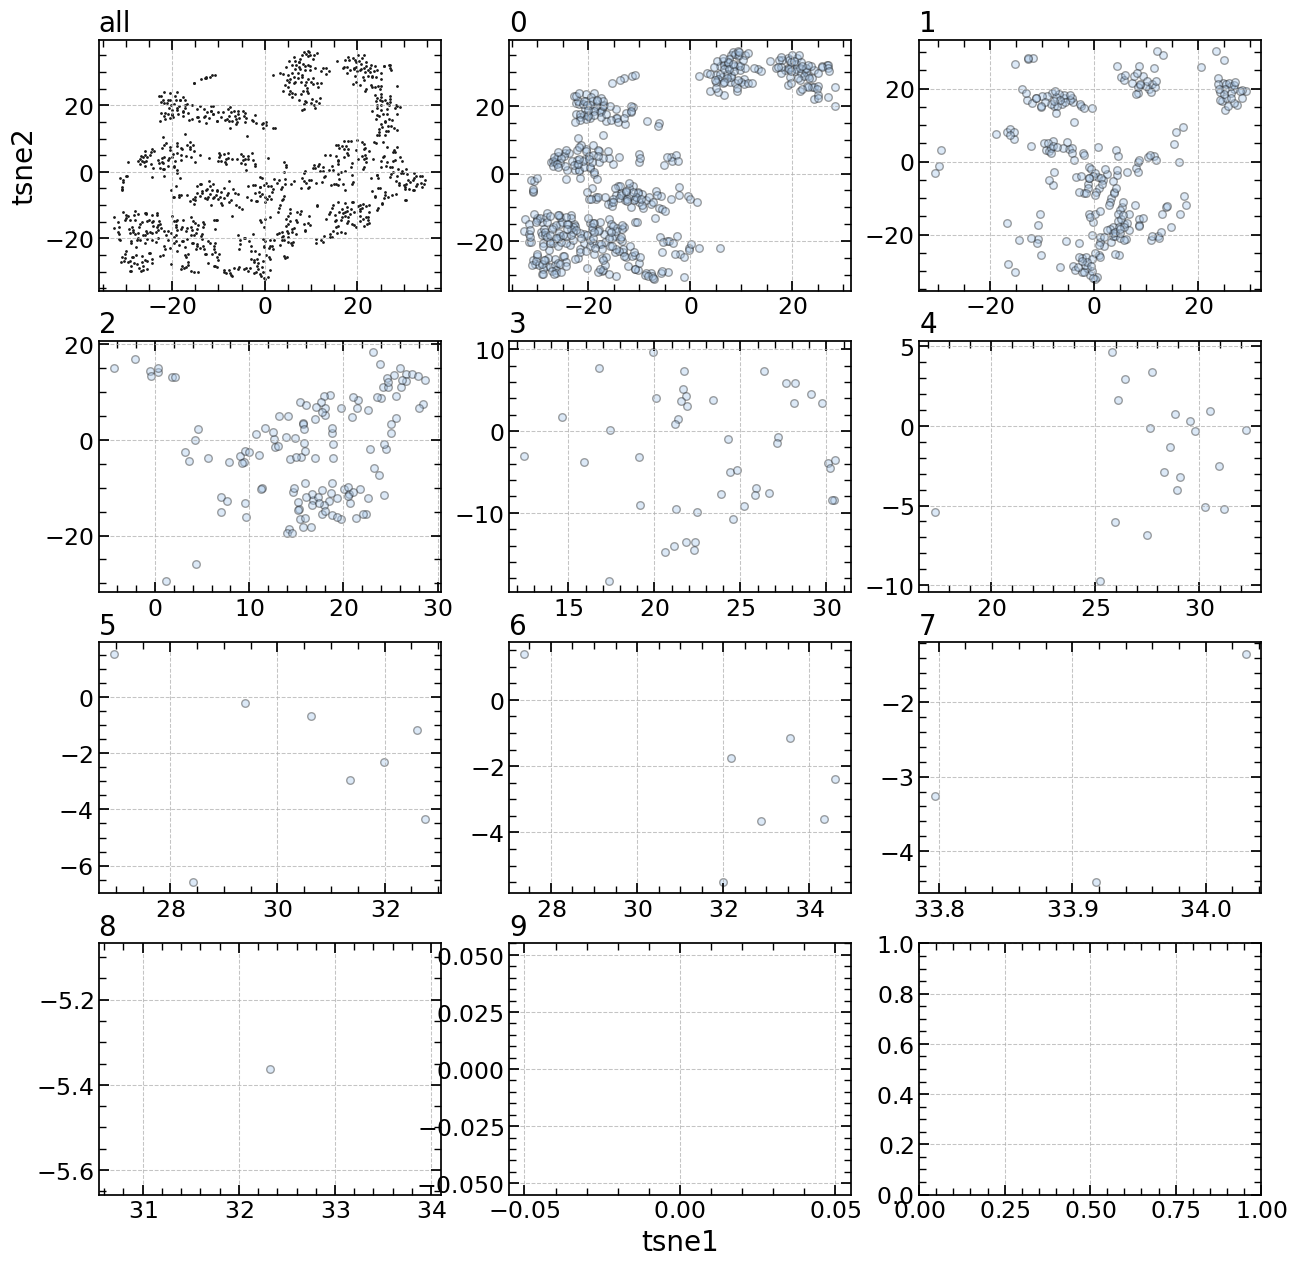

In [54]:
limit_labels = len(features_embedding)

fig, axs = plt.subplots(4, (len(np.unique(labels))+1)//4+1, figsize = (15,15))
axs=axs.flatten()


axs[0].scatter(features_embedding[:limit_labels, 0], features_embedding[:limit_labels, 1], c = 'k', s = 1)

for i,label in enumerate(np.unique(labels)):
    mask = labels[:limit_labels]==label
    axs[i+1].scatter(features_embedding[:limit_labels, 0][mask], features_embedding[:limit_labels, 1][mask], s = 30, alpha = 0.4)

    axs[i+1].set_title(label)

axs[0].set_title('all')

axs[i+1].set_xlabel('tsne1')
axs[0].set_ylabel('tsne2')



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

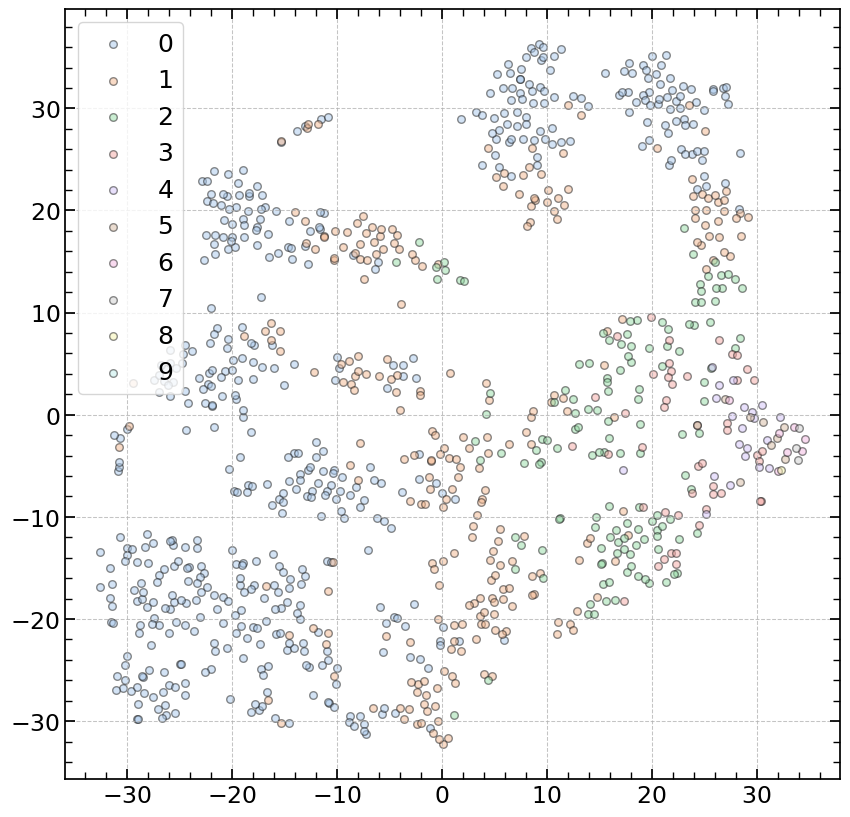

In [44]:
plt.figure(figsize=(10,10))
for label in np.unique(labels):
    idx = labels[:1000] == label
    plt.scatter(features_embedding[idx, 0], features_embedding[idx, 1], label=str(label), s=30, alpha = 0.5)

plt.legend()

In [36]:
idx

array([ True,  True, False, ..., False, False, False])

In [34]:
features_embedding[:,0]

TSNEEmbedding([ 18.51510816,  22.84209839,  24.18363509,  32.60255931,
                19.11898276,  24.35027505,  28.45411694,  25.15570806,
                19.5261407 ,  23.91977947,  28.46446639,  24.18608417,
                24.02326545,  20.91063487,  29.19916434,  27.46231136,
                20.64564291,  24.81937433,  23.85153153,  20.52438632,
                15.59715848,  25.85741129,  22.58698988,  25.34746322,
                24.26956012,  23.80560996,  21.70585513,  25.80307683,
                19.7444002 ,  21.5401802 , -29.44139123,  17.81350719,
                27.9825701 ,  21.01976948,  22.28768523,  24.66439546,
                19.17813614,  34.02979414,  25.36442372,  20.79843715,
                23.72364657,  21.7898071 ,  19.1414538 ,  26.92921473,
                26.8306494 ,  25.51787467,  23.12659331,  26.31546755,
                26.90576707,  20.69447658,  24.35783003,  27.67733403,
                28.33350923,  23.57164435,  21.74358376,  27.08880171,
      